In [8]:
import pandas as pd

data = pd.read_csv('cars.csv', chunksize=1000)

filtered_data = (chunk[chunk['Country'] == 'Germany'] for chunk in data)


for chunk in filtered_data:
    print(chunk.head())


   First Name Last Name  Country Car Brand Car Model Car Color  \
74     Curtis      Kurt  Germany    Jaguar    X-Type    Violet   

    Year of Manufacture Credit Card Type  
74                 2004  americanexpress  
     First Name Last Name  Country  Car Brand Car Model Car Color  \
1001       Hall    Mathet  Germany     Nissan    Xterra    Yellow   
1156     Antoni  Yeardley  Germany  Chevrolet    Camaro    Maroon   

      Year of Manufacture Credit Card Type  
1001                 2007           switch  
1156                 1979       mastercard  
     First Name Last Name  Country  Car Brand      Car Model Car Color  \
2272     Karlis  Neilands  Germany  Chevrolet  G-Series 3500      Teal   
2492   Melisent     Tamas  Germany      Scion             xA      Blue   

      Year of Manufacture Credit Card Type  
2272                 1998            laser  
2492                 2006       mastercard  
     First Name  Last Name  Country  Car Brand    Car Model  Car Color  \
3084  

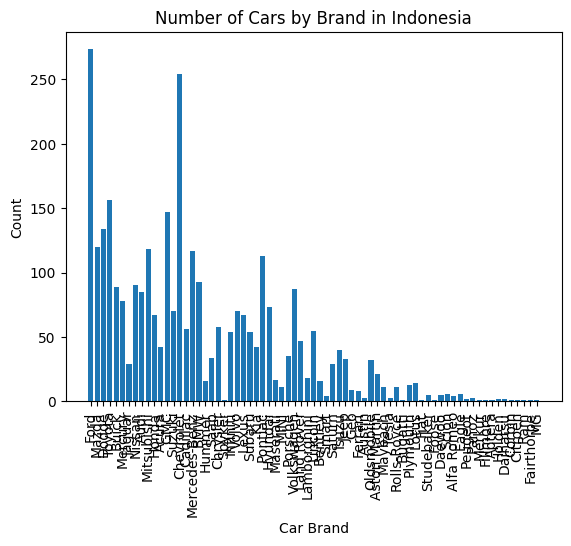

In [9]:
import pandas as pd


data = pd.read_csv('cars.csv', chunksize=1000)


filtered_data = (chunk[chunk['Country'] == 'Indonesia'] for chunk in data)




brands_count = {}
for chunk in filtered_data:
    for brand in chunk['Car Brand']:
        brands_count[brand] = brands_count.get(brand, 0) + 1


import matplotlib.pyplot as plt

plt.bar(brands_count.keys(), brands_count.values())
plt.xlabel('Car Brand')
plt.ylabel('Count')
plt.title('Number of Cars by Brand in Indonesia')
plt.xticks(rotation=90)
plt.show()


C:\Users\UAlwaysHere\AppData\Local\Temp\ipykernel_12872\1827546134.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year of Manufacture'] = pd.to_datetime(chunk['Year of Manufacture'], format='%Y')
C:\Users\UAlwaysHere\AppData\Local\Temp\ipykernel_12872\1827546134.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year of Manufacture'] = pd.to_datetime(chunk['Year of Manufacture'], format='%Y')
C:\Users\UAlwaysHere\AppData\Local\Temp\ipykernel_12872\1827546134.py:14: SettingWithCopyWarni

Средний год выпуска автомобилей: 2000


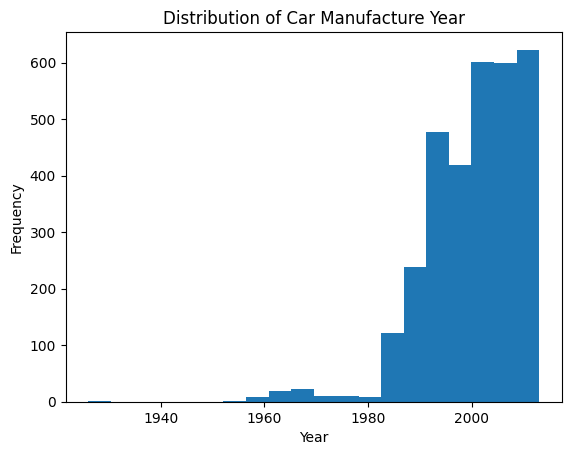

In [5]:
import pandas as pd


data = pd.read_csv('cars.csv', chunksize=1000)


filtered_data = (chunk[chunk['Country'] == 'Indonesia'] for chunk in data)


valid_years = []  

for chunk in filtered_data:
    try:
        chunk['Year of Manufacture'] = pd.to_datetime(chunk['Year of Manufacture'], format='%Y')
        valid_years.append(chunk['Year of Manufacture'].dropna())  
    except (ValueError, TypeError):
        pass 


if valid_years:
    all_years = pd.concat(valid_years)
    mean_year = all_years.mean()
    print("Средний год выпуска автомобилей:", mean_year.year)

   
    import matplotlib.pyplot as plt
    plt.hist(all_years.dt.year, bins=20)
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title('Distribution of Car Manufacture Year')
    plt.show()
else:
    print("Нет данных для анализа.")
